## Objektif
Final Project 1 ini dibuat guna mengevaluasi konsep Regression sebagai berikut:
- Mampu memahami konsep regression dengan Linear Regression
- Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
- Mampu mengimplementasikan Linear Regression untuk membuat prediksi

#### Instruksi
Final Project dikerjakan dalam format notebook dengan/atau dengan model deployment
(Opsional) dengan beberapa kriteria wajib di bawah ini:
1. Machine learning framework yang digunakan adalah Scikit-Learn
2. Ada penggunaan library visualisasi, seperti matplotlib atau seaborn
3. Project dinyatakan selesai dan diterima untuk dinilai jika saat dilakukan Run All
pada notebook, semua cell berhasil tereksekusi sampai akhir.
4. Isi notebook harus mengikuti outline di bawah ini:

    1. Perkenalan
Bab pengenalan harus diisi dengan latar belakang memilih kasus, data yang
digunakan (jumlah data, kelas, sumber), dan objective yang ingin dicapai.

    2. Import pustaka yang dibutuhkan
Cell pertama pada notebook harus berisi dan hanya berisi semua library
yang digunakan dalam project.

    3. Data Loading
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan
explorasi data secara sederhana.

    4. Data Cleaning
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya.

    5. Explorasi Data
Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.

    6. Data Preprocessing
Bagian ini berisi proses penyiapan data untuk proses pelatihan model,
seperti pembagian data menjadi train-dev-test, transformasi data
(normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

    7. Pendefinisian Model
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.
Akan lebih bagus jika didahului dengan penjelasan mengapa memilih
arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter,
dan hal lain yang berkaitan.

    8. Pelatihan Model
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang
dihasilkan.

    9. Evaluasi Model
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan
bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus
dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan
model. Jika memilih untuk melakukan model deployment, lanjut ke poin
dibawah. Jika tidak, lanjut ke poin 5 dan 6.

    10. Model Inference
Bagian ini diisi dengan model inference, di mana model yang sudah kita
latih akan dicoba pada data selain data yang sudah tersedia. Data yang
dimaksud bisa berupa data buatan oleh student, ataupun data yang ada
pada internet.

    11. Pengambilan Kesimpulan
Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil
yang didapat dengan dibandingkan dengan objective yang sudah ditulis di
bagian pengenalan.
5. Notebook harus diupload dalam akun GitHub masing-masing siswa untukselanjutnya dinilai
6. Lakukan model deployment ke Heroku.
7. Penilaian project dilakukan berdasarkan notebook dan service/API model yangsudah di-deploy (Jika melakukan model deployment).

#### Project Overview
Database ini memiliki 57 atribut, tetapi yang paling relevan ada 10 atribut dari semuanya.
Final Project 1 ini dibuat guna mengevaluasi konsep Regression sebagai berikut:
- Mampu memahami konsep regression dengan Linear Regression
- Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
- Mampu mengimplementasikan Linear Regression untuk membuat prediksi

#### Attribute Information:
1. id
2. timestamp
3. hour
4. day
5. month
6. datetime
7. timezone
8. source: destinasi awal
9. destination: destinasi akhir
10. cab_type: tipe transportasi (uber / lyft)
11. … dan lainnya

#### Starting from Scratch
Kalian dapat membuat file jupyter notebook sendiri dan upload ke github ketika selesai:
1. Download Dataset yang diperlukan di sini (data uber vs lyft), lalu save ke folder
/dataset.
2. Buat sebuah Notebook baru, lalu rename file menjadi “PYTN_KampusMerdeka_fp1_nama"
3. Bersihkan dan preproses Dataset kamu.
4. Bangun model menggunakan Logistic Regression, KNN, SVM, Naive Bayes,
Decision Tree, dan Random Forest, atau teknik lainnya.
5. Pilih 1 algoritma yang kamu anggap paling sesuai lalu jelaskan mengapa.
6. Kumpulkan informasi melalui analisis kamu.

### Final Project 1 
Latar Belakang memilih Kasus:
Ingin membangun sebuah model klasifikasi yang bisa memprediksi terjadinya hujan di Australia berdasarkan nilai fitur yang diinputkan.

Data yang digunakan (jumlah data, kelas, sumber):
Objective yang ingin dicapai:


## Install dan Import Pustaka yang dibutuhkan

In [4]:
'''Pustaka untuk pengolahan data'''
import pandas as pd
import numpy as np
from scipy import stats

'''Pustaka untuk proses machine learning dan data science'''
# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder #ordinal encoding untuk atribut kategorikal
from sklearn.preprocessing import MinMaxScaler,StandardScaler #scaler for normalization 
from sklearn.preprocessing import OneHotEncoder #one hot encoding nominal atribut


# Chi-Square and Mutual Information feature selection for numeric input and categorical output
from sklearn.feature_selection import mutual_info_classif


# splitting dataset and kfold
from sklearn.model_selection import train_test_split,KFold, cross_val_score, GridSearchCV

# modelling
from sklearn.linear_model import LinearRegression

# model performance
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix

'''Pustaka untuk Visualisasi'''
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


'''Pustaka Pendukung'''
# save models
import pickle

## Data Loading

In [64]:
# Loading data dengan Pandas
df_uber_asli = pd.read_csv('rideshare_kaggle.csv', skipinitialspace=True)
df = pd.read_csv('rideshare_kaggle.csv', skipinitialspace=True)

In [6]:
# Menampilkan sekilas isi data
df_uber_asli

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [7]:
# Mengetahui dimensi data
df_uber_asli.shape

(693071, 57)

In [8]:
# Mengetahui daftar kolom
daftar_kolom = df_uber_asli.columns.values
print(daftar_kolom)

['id' 'timestamp' 'hour' 'day' 'month' 'datetime' 'timezone' 'source'
 'destination' 'cab_type' 'product_id' 'name' 'price' 'distance'
 'surge_multiplier' 'latitude' 'longitude' 'temperature'
 'apparentTemperature' 'short_summary' 'long_summary' 'precipIntensity'
 'precipProbability' 'humidity' 'windSpeed' 'windGust' 'windGustTime'
 'visibility' 'temperatureHigh' 'temperatureHighTime' 'temperatureLow'
 'temperatureLowTime' 'apparentTemperatureHigh'
 'apparentTemperatureHighTime' 'apparentTemperatureLow'
 'apparentTemperatureLowTime' 'icon' 'dewPoint' 'pressure' 'windBearing'
 'cloudCover' 'uvIndex' 'visibility.1' 'ozone' 'sunriseTime' 'sunsetTime'
 'moonPhase' 'precipIntensityMax' 'uvIndexTime' 'temperatureMin'
 'temperatureMinTime' 'temperatureMax' 'temperatureMaxTime'
 'apparentTemperatureMin' 'apparentTemperatureMinTime'
 'apparentTemperatureMax' 'apparentTemperatureMaxTime']


In [9]:
# Meihat tipe data setiap kolom
df_uber_asli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

## Data Cleaning
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya. 

In [10]:
#cek null values
df_uber_asli.isnull().sum().sort_values()

id                                 0
temperatureLow                     0
temperatureLowTime                 0
apparentTemperatureHigh            0
apparentTemperatureHighTime        0
apparentTemperatureLow             0
apparentTemperatureLowTime         0
icon                               0
dewPoint                           0
pressure                           0
windBearing                        0
cloudCover                         0
uvIndex                            0
visibility.1                       0
ozone                              0
sunriseTime                        0
sunsetTime                         0
moonPhase                          0
precipIntensityMax                 0
uvIndexTime                        0
temperatureMin                     0
temperatureMinTime                 0
temperatureMax                     0
temperatureMaxTime                 0
apparentTemperatureMin             0
apparentTemperatureMinTime         0
temperatureHighTime                0
a

In [11]:
mean = df_uber_asli['price'].mean()

In [12]:
data = df_uber_asli.copy()

In [13]:
data['price'].fillna(mean, inplace=True)
data['price'].isnull().sum()

0

In [14]:
data['visibility'].head()

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility, dtype: float64

In [15]:
data['visibility.1'].head() 

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility.1, dtype: float64

In [16]:
data = data.drop(['visibility.1'],axis=1)  

In [17]:
# Untuk pemodelan ini, kita tidak memerlukan fitur terkait tanggal dan sistem koordinat

new_data = data.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime', 'longitude','latitude'],axis=1)

**Melihat Korelasi semua atribut terhadap atribut price**

In [18]:
temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh','apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']
df_temp = new_data[temp_cols]
climate_cols = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
df_clim = new_data[climate_cols] 

In [19]:
df_temp.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75,9.0


In [20]:
df_clim.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0


<AxesSubplot:>

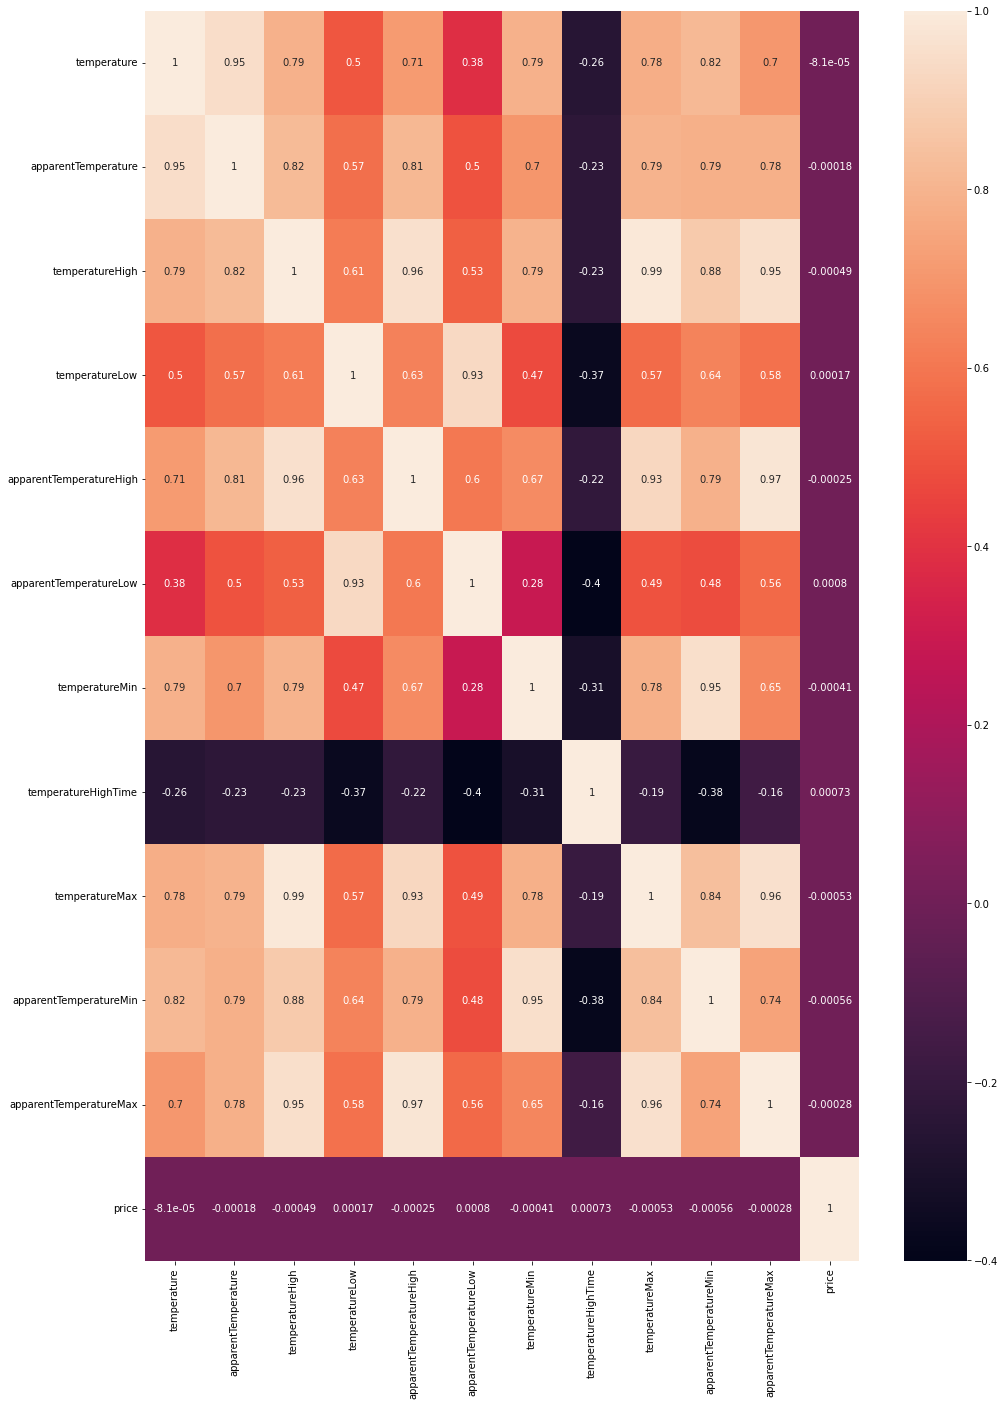

In [21]:
plt.figure(figsize=(16,23))
sns.heatmap(df_temp.corr(),annot=True) 

<AxesSubplot:>

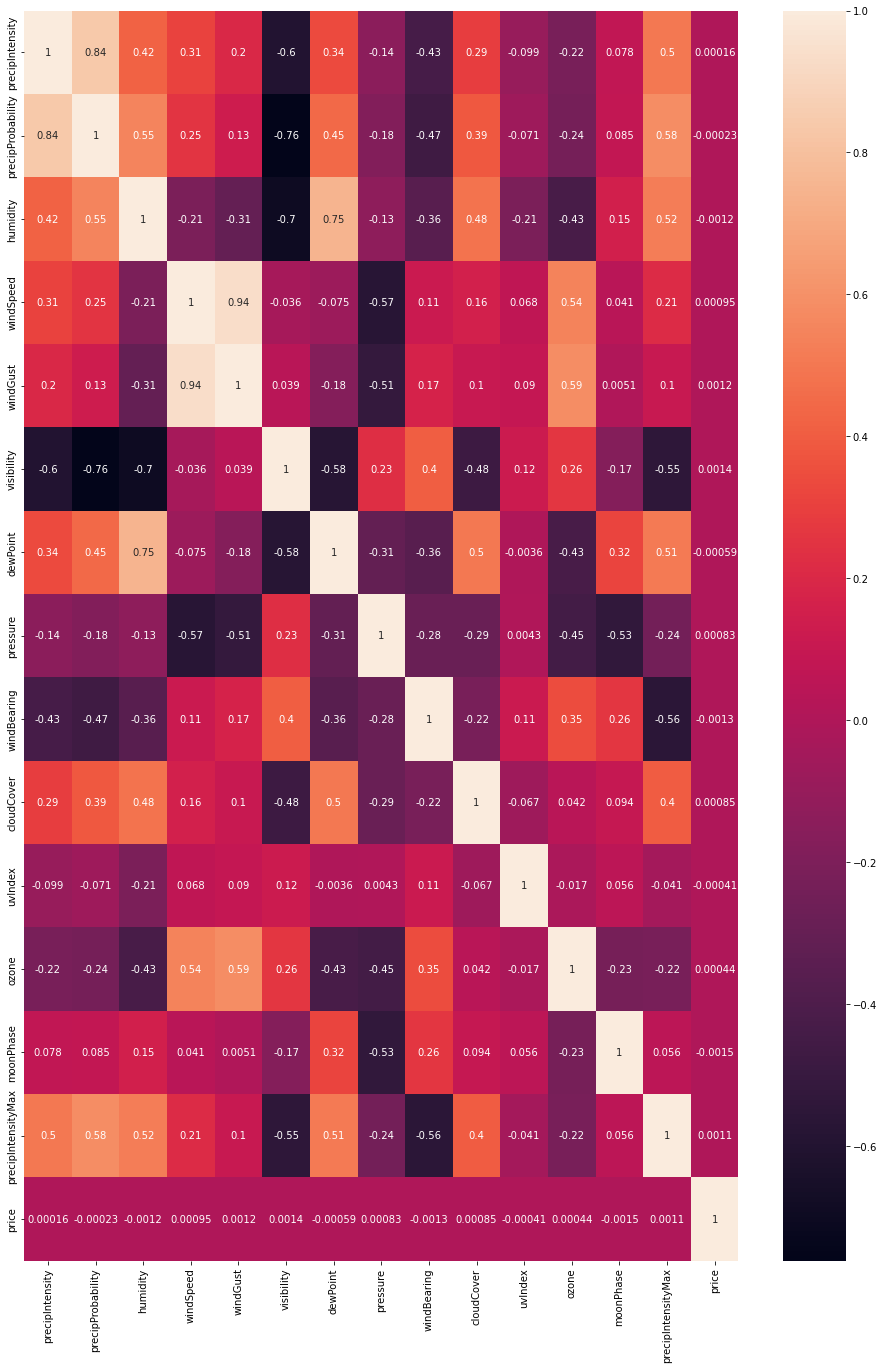

In [22]:
plt.figure(figsize=(16,23))
sns.heatmap(df_clim.corr(),annot=True)  

Berdasarkan korelasi diatas, dapat disimpulkan bahwa baik atribut di temp_cols maupun di climate_cols memiliki korelasi yang lemah dengan atribut price. sehingga kolom-kolom tersebut dapat didrop

In [23]:
new_data = new_data.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh','apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax',
'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)

In [24]:
new_data 

,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,short_summary,icon
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.000000,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.000000,0.44,1.0,Rain,rain
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.000000,0.44,1.0,Clear,clear-night
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.000000,0.44,1.0,Clear,clear-night
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.000000,0.44,1.0,Partly Cloudy,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,23,1,12,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.000000,1.00,1.0,Partly Cloudy,partly-cloudy-night
693067,23,1,12,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.500000,1.00,1.0,Partly Cloudy,partly-cloudy-night
693068,23,1,12,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,16.545125,1.00,1.0,Partly Cloudy,partly-cloudy-night
693069,23,1,12,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.000000,1.00,1.0,Partly Cloudy,partly-cloudy-night


In [25]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              693071 non-null  int64  
 1   day               693071 non-null  int64  
 2   month             693071 non-null  int64  
 3   timezone          693071 non-null  object 
 4   source            693071 non-null  object 
 5   destination       693071 non-null  object 
 6   cab_type          693071 non-null  object 
 7   product_id        693071 non-null  object 
 8   name              693071 non-null  object 
 9   price             693071 non-null  float64
 10  distance          693071 non-null  float64
 11  surge_multiplier  693071 non-null  float64
 12  short_summary     693071 non-null  object 
 13  icon              693071 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 74.0+ MB


In [26]:
object_cols =  new_data.select_dtypes(include=['object','category']).columns.tolist()
for column in new_data[object_cols]:
    print(f'{column} : {new_data[column].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2'
 '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi']

short_summary : [' M

Kita dapat melihat bahwa pada kolom timezone hanya memiliki 1 value dan kolom prduct_id memiliki value yang tida terdefinisi maka dua kolom tersebut dapat didrop.

In [27]:
new_data = new_data.drop(['timezone','product_id'],axis=1)

In [28]:
new_data.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


In [29]:
category_cols = ['source','destination','cab_type','name','short_summary','icon', 'price']
new_cat = new_data[category_cols] 


le = preprocessing.LabelEncoder()

new_cat_encode = new_cat.copy()
for col in new_cat_encode.select_dtypes(include='O').columns:
    new_cat_encode[col]=le.fit_transform(new_cat_encode[col]) 

In [30]:
new_cat_encode

,source,destination,cab_type,name,short_summary,icon,price
0,5,7,0,7,4,5,5.000000
1,5,7,0,2,8,6,11.000000
2,5,7,0,5,0,1,7.000000
3,5,7,0,4,0,1,26.000000
4,5,7,0,6,6,5,9.000000
...,...,...,...,...,...,...,...
693066,11,6,1,11,6,5,13.000000
693067,11,6,1,10,6,5,9.500000
693068,11,6,1,8,6,5,16.545125
693069,11,6,1,1,6,5,27.000000


In [31]:
new_data 

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.000000,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.000000,0.44,1.0,Rain,rain
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.000000,0.44,1.0,Clear,clear-night
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.000000,0.44,1.0,Clear,clear-night
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.000000,0.44,1.0,Partly Cloudy,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...
693066,23,1,12,West End,North End,Uber,UberXL,13.000000,1.00,1.0,Partly Cloudy,partly-cloudy-night
693067,23,1,12,West End,North End,Uber,UberX,9.500000,1.00,1.0,Partly Cloudy,partly-cloudy-night
693068,23,1,12,West End,North End,Uber,Taxi,16.545125,1.00,1.0,Partly Cloudy,partly-cloudy-night
693069,23,1,12,West End,North End,Uber,Black SUV,27.000000,1.00,1.0,Partly Cloudy,partly-cloudy-night


<AxesSubplot:>

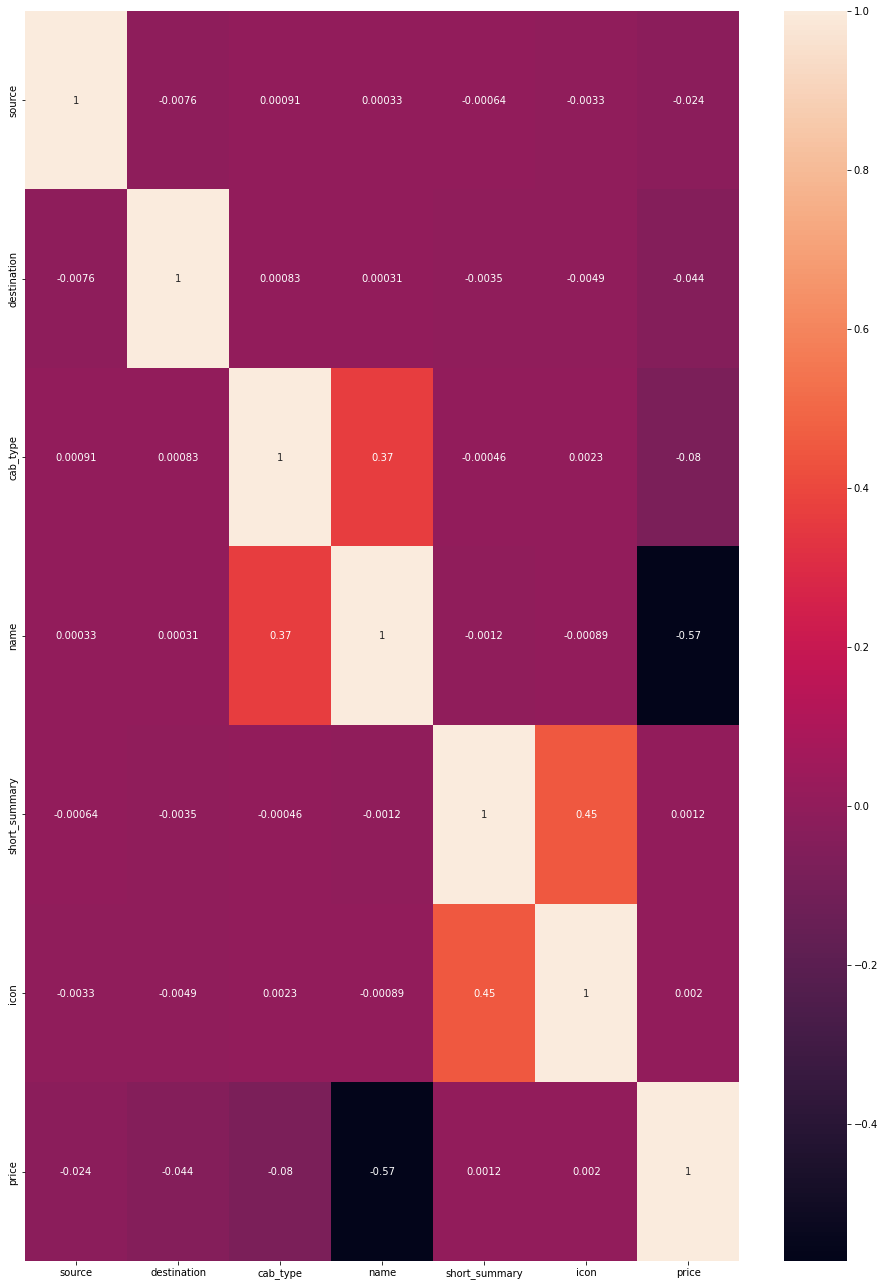

In [32]:
plt.figure(figsize=(16,23))
sns.heatmap(new_cat_encode.corr(),annot=True) 

In [33]:
data['short_summary'] = data['short_summary'].astype('category')
data['short_summary'] = data['short_summary'].astype('category')


In [34]:
dff = data.loc[(data['destination']== 'Fenway' )&(data['cab_type']== 'Uber')]
dff

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
37,39f120bf-ddc0-4d27-8ab4-bb7d46ecf8e3,1.543639e+09,4,1,12,2018-12-01 04:32:57,America/New_York,North Station,Fenway,Uber,...,0.0003,1543593600,28.68,1543575600,42.58,1543600800,27.26,1543568400,40.53,1543611600
38,4d36b792-8973-4dd2-aaf9-aacaac046bd5,1.543415e+09,14,28,11,2018-11-28 14:23:07,America/New_York,North Station,Fenway,Uber,...,0.0000,1543420800,33.75,1543399200,42.60,1543438800,29.97,1543399200,36.58,1543438800
39,53bc8bc7-0b27-4648-9742-d7956d2a13a8,1.543740e+09,8,2,12,2018-12-02 08:32:56,America/New_York,North Station,Fenway,Uber,...,0.0894,1543770000,36.40,1543726800,50.94,1543788000,35.78,1543748400,50.27,1543788000
40,7f47ff53-7cf2-4a6a-8049-83c90e042593,1.543524e+09,20,29,11,2018-11-29 20:38:05,America/New_York,North Station,Fenway,Uber,...,0.0000,1543510800,35.15,1543550400,44.66,1543510800,30.98,1543550400,38.30,1543510800
41,c05d4e09-3f00-43cf-a0d8-6f38c0f4d04a,1.544789e+09,12,14,12,2018-12-14 12:05:05,America/New_York,North Station,Fenway,Uber,...,0.0000,1544806800,27.11,1544781600,46.61,1544814000,27.76,1544781600,43.85,1544817600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692991,5275bda4-5674-4a23-9389-e9e802611642,1.543885e+09,1,4,12,2018-12-04 01:03:01,America/New_York,North Station,Fenway,Uber,...,0.0004,1543852800,42.86,1543896000,57.08,1543852800,39.54,1543896000,56.41,1543852800
692992,8e15bb21-0854-4feb-8a14-63d1cc714536,1.543885e+09,1,4,12,2018-12-04 01:03:01,America/New_York,North Station,Fenway,Uber,...,0.0004,1543852800,42.86,1543896000,57.08,1543852800,39.54,1543896000,56.41,1543852800
692993,9296af21-d421-44a4-bba8-604942dc91d3,1.543885e+09,1,4,12,2018-12-04 01:03:01,America/New_York,North Station,Fenway,Uber,...,0.0004,1543852800,42.86,1543896000,57.08,1543852800,39.54,1543896000,56.41,1543852800
692994,b8d0ee36-26fa-48ce-bcd4-7368a450e51b,1.543479e+09,8,29,11,2018-11-29 08:18:01,America/New_York,North Station,Fenway,Uber,...,0.0000,1543510800,35.20,1543550400,44.96,1543510800,31.40,1543550400,38.85,1543510800


In [35]:
dff['price'] 

37        29.500000
38         9.500000
39        15.000000
40        16.545125
41         9.500000
            ...    
692991    34.000000
692992    10.000000
692993    26.000000
692994    16.545125
692995    16.500000
Name: price, Length: 32137, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [37]:
dff['short_summary'] = dff['short_summary'].astype('category')
dff['short_summary'] = dff['short_summary'].cat.codes 

C:\Users\user\AppData\Local\Temp\ipykernel_9764\4123870467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['short_summary'] = dff['short_summary'].astype('category')
C:\Users\user\AppData\Local\Temp\ipykernel_9764\4123870467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['short_summary'] = dff['short_summary'].cat.codes


In [38]:
dff.isnull().sum() 

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [39]:
x = dff[['hour','distance','short_summary']]
y = dff['price'] 

In [40]:
x

,hour,distance,short_summary
37,4,2.94,4
38,14,2.94,6
39,8,2.94,7
40,20,2.94,6
41,12,2.94,6
...,...,...,...
692991,1,3.05,6
692992,1,3.05,6
692993,1,3.05,6
692994,8,3.05,4


In [41]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
# Standarisasi data
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test) 

In [42]:
lr = LinearRegression()

In [43]:
model = lr.fit(x_train, y_train)
model

LinearRegression()

In [44]:
lr.coef_

array([ 0.04570126,  2.3947103 , -0.05133547])

In [45]:
y_pred_train = lr.predict(x_train) 

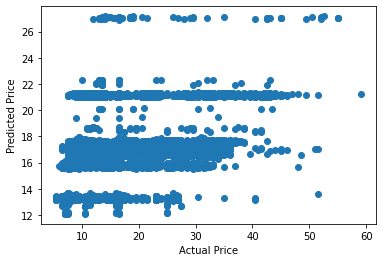

In [46]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Price') 
plt.ylabel('Predicted Price')
plt.show()

In [47]:
from sklearn.metrics import r2_score 

In [48]:
r2_score(y_train, y_pred_train) 

0.08544041217258369

In [49]:
y_pred_test = lr.predict(x_test) 

In [50]:
model.score(x_test, y_test)  

0.08221501766605976

In [51]:
model.score(x_train, y_train)   

0.08544041217258369

In [52]:
lr.score(x_train, y_train)   

0.08544041217258369

# untuk feature 'hour','distance','short_summary','source'


In [53]:
dff[['hour','distance','short_summary','source']]

,hour,distance,short_summary,source
37,4,2.94,4,North Station
38,14,2.94,6,North Station
39,8,2.94,7,North Station
40,20,2.94,6,North Station
41,12,2.94,6,North Station
...,...,...,...,...
692991,1,3.05,6,North Station
692992,1,3.05,6,North Station
692993,1,3.05,6,North Station
692994,8,3.05,4,North Station


In [54]:
dff['source'] = dff['source'].astype('category')
dff['source'] = dff['source'].cat.codes 

C:\Users\user\AppData\Local\Temp\ipykernel_9764\604133910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['source'] = dff['source'].astype('category')
C:\Users\user\AppData\Local\Temp\ipykernel_9764\604133910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['source'] = dff['source'].cat.codes


In [55]:
X = dff[['hour','distance','short_summary','source']]
Y = dff['price']

In [56]:
X

,hour,distance,short_summary,source
37,4,2.94,4,3
38,14,2.94,6,3
39,8,2.94,7,3
40,20,2.94,6,3
41,12,2.94,6,3
...,...,...,...,...
692991,1,3.05,6,3
692992,1,3.05,6,3
692993,1,3.05,6,3
692994,8,3.05,4,3


In [57]:
#splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)
# Standarisasi data
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)  

In [58]:
lr.fit(X_train, Y_train)

LinearRegression()

In [59]:
Y_pred_train = lr.predict(X_train)  

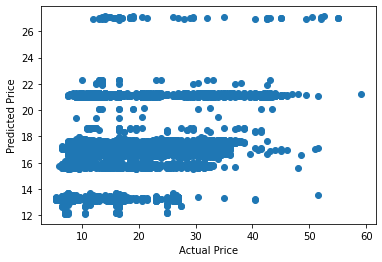

In [60]:
plt.scatter(Y_train, Y_pred_train) 
plt.xlabel('Actual Price') 
plt.ylabel('Predicted Price')
plt.show()

In [61]:
r2_score(Y_train, Y_pred_train) 

0.08544239230586959

In [62]:
lr.score(X_train, Y_train)

0.08544239230586959

In [63]:
metrics.accuracy_score(y_test,y_pred_test) 

ValueError: continuous is not supported

# New Model by me

In [68]:
df.dropna(axis=0,inplace=True)

In [69]:
new_df = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'],axis=1)

In [70]:
new_df = new_df.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax'],axis=1)
new_df.shape

(637976, 31)

In [71]:
new_df = new_df.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)
new_df.shape

(637976, 17)

In [75]:
new_df

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,short_summary,icon,visibility.1
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.0330,Mostly Cloudy,partly-cloudy-night,10.000
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.0330,Rain,rain,4.786
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,Clear,clear-night,10.000
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,Clear,clear-night,10.000
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,Partly Cloudy,partly-cloudy-night,10.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,23,1,12,West End,North End,Uber,WAV,9.5,1.00,1.0,42.3519,-71.0643,Partly Cloudy,partly-cloudy-night,9.785
693066,23,1,12,West End,North End,Uber,UberXL,13.0,1.00,1.0,42.3519,-71.0643,Partly Cloudy,partly-cloudy-night,9.785
693067,23,1,12,West End,North End,Uber,UberX,9.5,1.00,1.0,42.3519,-71.0643,Partly Cloudy,partly-cloudy-night,9.785
693069,23,1,12,West End,North End,Uber,Black SUV,27.0,1.00,1.0,42.3519,-71.0643,Partly Cloudy,partly-cloudy-night,9.785


In [76]:
new_cat = ['source',
 'destination',
 'cab_type',
 'name',
 'short_summary',
 'icon','price']

df_cat = new_df[new_cat]
df_cat.head()

,source,destination,cab_type,name,short_summary,icon,price
0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,partly-cloudy-night,5.0
1,Haymarket Square,North Station,Lyft,Lux,Rain,rain,11.0
2,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night,7.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,clear-night,26.0
4,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,partly-cloudy-night,9.0


In [77]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [78]:
df_cat_encode

,source,destination,cab_type,name,short_summary,icon,price
0,5,7,0,7,4,5,5.0
1,5,7,0,2,8,6,11.0
2,5,7,0,5,0,1,7.0
3,5,7,0,4,0,1,26.0
4,5,7,0,6,6,5,9.0
...,...,...,...,...,...,...,...
693065,11,6,1,11,6,5,9.5
693066,11,6,1,10,6,5,13.0
693067,11,6,1,9,6,5,9.5
693069,11,6,1,1,6,5,27.0


<AxesSubplot:>

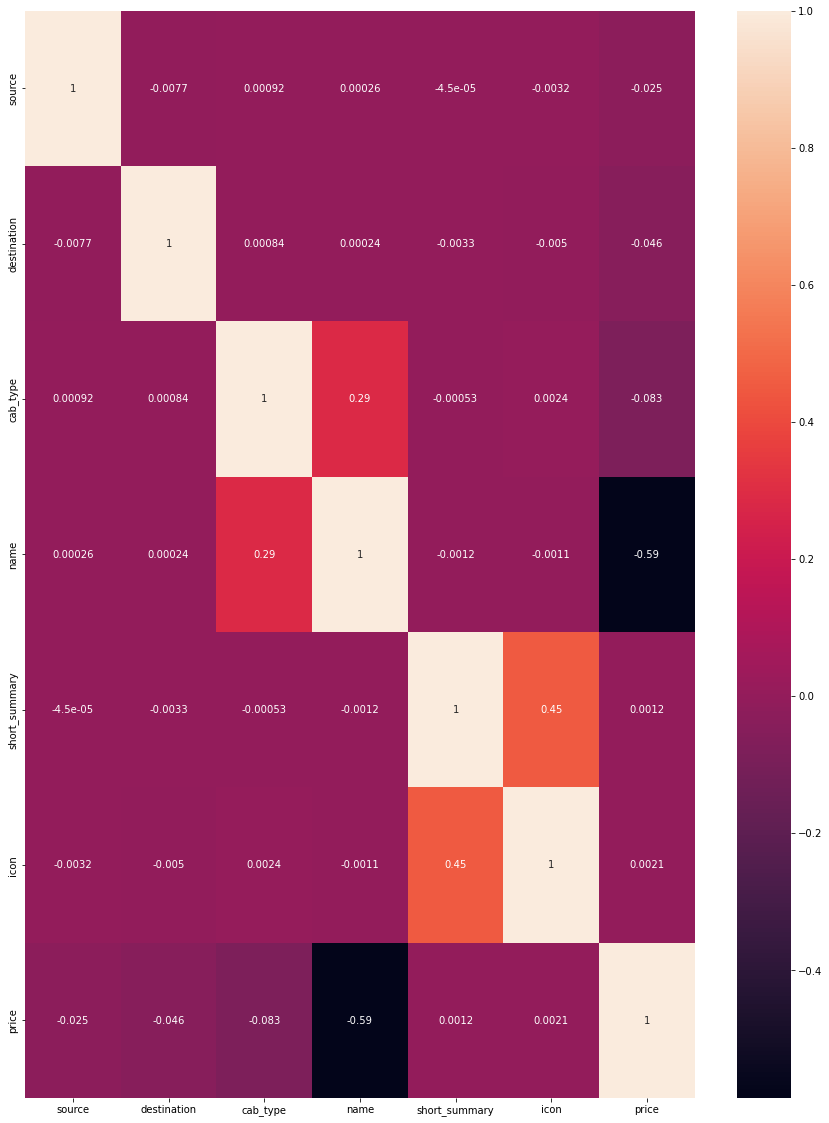

In [79]:
plt.figure(figsize=(15,20))
sns.heatmap(df_cat_encode.corr(),annot=True)

In [98]:
new_df = new_df.drop(['source','destination','short_summary','icon'],axis=1)
new_df.head()

KeyError: "['source', 'destination', 'short_summary', 'icon'] not found in axis"

In [97]:
ne

,hour,day,month,cab_type,name,price,distance,surge_multiplier,latitude,longitude,visibility.1
0,9,16,12,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.0330,10.000
1,2,27,11,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.0330,4.786
2,1,28,11,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,10.000
3,4,30,11,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,10.000
4,3,29,11,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,10.000
...,...,...,...,...,...,...,...,...,...,...,...
693065,23,1,12,Uber,WAV,9.5,1.00,1.0,42.3519,-71.0643,9.785
693066,23,1,12,Uber,UberXL,13.0,1.00,1.0,42.3519,-71.0643,9.785
693067,23,1,12,Uber,UberX,9.5,1.00,1.0,42.3519,-71.0643,9.785
693069,23,1,12,Uber,Black SUV,27.0,1.00,1.0,42.3519,-71.0643,9.785
